# 안녕하세요^^ 
## AIVLE 미니프로젝트 '서울시 생활정보 기반 대중교통 수요 분석 ' 과정에 오신 여러분을 환영합니다.
* 본 과정에서는 실제 사례와 데이터를 기반으로 문제를 해결하는 전체 과정을 자기 주도형 실습으로 진행해볼 예정입니다.
* 앞선 교육과정을 정리하는 마음과 지금까지 배운 내용을 바탕으로 문제 해결을 해볼게요!
* 미니 프로젝트를 통한 문제 해결 과정 'A에서 Z까지', 지금부터 시작합니다!

## 개인과제
* 데이터 구조, 분포 확인, 전처리 : 1.1_버스정류장데이터 / 1.2 유동인구데이터 / 1.3_주민등록데이터 / 1.4_업종등록데이터
* 데이터간 관계 가설 수립 및 검증 : 1.5_데이터 분석

---

# 데이터 분석부터 먼저 시작해보겠습니다.
## "구별 업종 등록 데이터" 를 확인해 보도록 하겠습니다

In [ ]:
# 필요 라이브러리부터 설치합니다.
%pip install pandas seaborn

## 기본전제
* 처음에 제공되는 기본/추가 데이터는 'raw_data' 폴더에 있습니다.

[기본 데이터]
* business_type.csv

[데이터 소개]
* 서울 시 구별 등록 업종 상위 10개 데이터
    * 택시운송업
    * 한식일반음식점업
    * 용달 화물자동차 운송업
    * 부동산 중개 및 대리업
    * 두발미용업
    * 커피전문점
    * 남녀용 겉옷 및 셔츠 도매업
    * 기타주점업
    * 일반 교과 학원
    * 한식 육류요리 전문점

[변수 소개]
* 다수 업종 상위 1~10

---

# 1.데이터 불러오기
## 모든 미니 프로젝트의 시작은 '데이터 불러오기' 부터라고 할 수 있습니다.
+ KeyPoint : 불러오고자 하는 데이터에 따라 자유롭게 변수로 지정할 수 있다.

###  데이터 프레임을 불러오고 변수로 저장(여기서는 CSV 기준으로 진행)
* csv : pd.read_csv("파일이름. csv")
* txt : pd.read_csv("파일이름. csv", sep="구분자")
* xlsx : pd.read_excel('파일이름.xlsx')
* pickle : pd.read_pickle("파일이름.pkl") <br>
 [참고] pickle은 파이썬의 모든 객체를 파일로 저장할 수 있는 방법으로 DataFrame,List,Dict 등 모든 객체 저장 가능(특히 sklearn라이브러리를 통해 모델을 학습시키고, 저장할 때 많이 사용)

## 기본전제
* 처음에 제공되는 데이터는 'raw_data' 폴더에 있습니다.

[기본 데이터]
* 1.4 business_type.csv

[데이터 소개]
* 서울시 업종 등록 데이터

#### [실습문제1] 데이터 로딩
* '1.4 business_type.csv'파일을 'seoul_business' 변수에 저장하고 그 데이터를 확인하세요.
    * 데이터 파일 로딩시 참고 사항 
        * 구분자(sep)는 ',' 입니다
        * UTF-8 인코더를 사용해 주세요

In [1]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
import pandas as pd


In [111]:
# 데이터 프레임의 Shape을 확인합니다.
seoul_business = pd.read_csv('C:/Users/User/Desktop/mini1/AIVLE/1.4 business_type.csv',sep = ',', encoding = 'UTF-8')

---

# 2.기본 정보 확인 및 클렌징

+ 데이터 클렌징 : 결측치, 이상치 등을 제거하여 데이터 분석 결과가 왜곡 되는 문제를 방지하기 위한 정제 과정

#### [실습문제2] 기본 정보 확인하기
* 'seoul_moving' 데이터의 정보를 확인해보세요.
* 'describe', 'info', 'head' 등 전부 활용해 보겠습니다.

In [107]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_business.describe()

,자치구,동,다수업종 상위10,다수업종 상위10.1,다수업종 상위10.2,다수업종 상위10.3,다수업종 상위10.4,다수업종 상위10.5,다수업종 상위10.6,다수업종 상위10.7,...,다수업종 상위10.10,다수업종 상위10.11,다수업종 상위10.12,다수업종 상위10.13,다수업종 상위10.14,다수업종 상위10.15,다수업종 상위10.16,다수업종 상위10.17,다수업종 상위10.18,다수업종 상위10.19
count,451,451,451,451,451,451,451,451,451,451,...,451,451,451,451,451,451,451,451,451,451
unique,27,425,226,280,176,305,177,180,142,205,...,131,239,69,147,127,189,113,222,107,230
top,송파구,소계,71,11,24,104,56,56,40,54,...,13,16,-,-,18,20,4,42,17,45
freq,28,25,7,7,11,6,8,9,11,9,...,18,8,82,82,14,10,15,10,16,9


In [113]:
seoul_business.columns = seoul_business.loc[0] + seoul_business.loc[1]

In [115]:
seoul_business.rename(columns = {'자치구자치구':'자치구','동동':'동'}, inplace = True)

In [116]:
seoul_business.head()

,자치구,동,택시운송업사업체수,택시운송업종사자수,한식 일반 음식점업사업체수,한식 일반 음식점업종사자수,용달 화물자동차 운송업사업체수,용달 화물자동차 운송업종사자수,부동산 중개 및 대리업사업체수,부동산 중개 및 대리업종사자수,...,커피전문점사업체수,커피전문점종사자수,남녀용 겉옷 및 셔츠 도매업사업체수,남녀용 겉옷 및 셔츠 도매업종사자수,기타주점업사업체수,기타주점업종사자수,일반 교과 학원사업체수,일반 교과 학원종사자수,한식 육류요리 전문점사업체수,한식 육류요리 전문점종사자수
0,자치구,동,택시운송업,택시운송업,한식 일반 음식점업,한식 일반 음식점업,용달 화물자동차 운송업,용달 화물자동차 운송업,부동산 중개 및 대리업,부동산 중개 및 대리업,...,커피전문점,커피전문점,남녀용 겉옷 및 셔츠 도매업,남녀용 겉옷 및 셔츠 도매업,기타주점업,기타주점업,일반 교과 학원,일반 교과 학원,한식 육류요리 전문점,한식 육류요리 전문점
1,자치구,동,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,...,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수
2,합계,합계,"47,176","76,701","29,225","100,183","28,494","29,356","24,013","42,636",...,"16,255","57,322","13,388","51,116","13,339","31,371","11,911","50,773","11,109","44,653"
3,종로구,소계,215,215,"1,548","5,912",618,646,549,889,...,948,"3,613",400,962,537,"1,413",110,382,437,"1,982"
4,종로구,사직동,7,7,230,982,12,12,57,96,...,124,525,2,18,74,177,9,34,45,220


In [117]:
seoul_business = seoul_business.loc[3:]
seoul_business = seoul_business[seoul_business['동'] == '소계']
seoul_business.replace("-","0", inplace=True)

In [104]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

seoul_business = seoul_business[['자치구','택시운송업사업체수','커피전문점사업체수','한식 일반 음식점업사업체수','기타주점업사업체수']]

#### [실습문제3] 데이터 확인 및 처리

* 데이터를 보았을때, 어느 데이터를 가져와야 할지 생각 해 봅시다.

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.


In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

In [105]:
# 해당 데이터프레임을 'df_seoul_business.csv' 파일로 저장하세요.

seoul_business.to_csv('C:/Users/User/Desktop/mini1/AIVLE/df_seoul_business.csv')

---

# 3.데이터 분석하기
+ KeyPoint : 데이터의 형태를 살펴보고 다양한 분석기법을 통해 모델링에 적합하도록 정제요소를 선별할 수 있다.
  * 데이터들의 패턴 탐색
  * 변수들간의 관계 파악

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# 시각화 한글폰트 설정
# 맑은 고딕

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

# scipy
import scipy.stats as spst

#### [실습문제4] 데이터 분포 알아보기
* 다양한 변수를 기준으로 그래프를 그려보고 인사이트를 도출해보세요.

In [63]:
seoul_business.columns

Index(['자치구', '동', '택시운송업사업체수', '택시운송업종사자수', '한식 일반 음식점업사업체수',
       '한식 일반 음식점업종사자수', '용달 화물자동차 운송업사업체수', '용달 화물자동차 운송업종사자수',
       '부동산 중개 및 대리업사업체수', '부동산 중개 및 대리업종사자수', '두발미용업사업체수', '두발미용업종사자수',
       '커피전문점사업체수', '커피전문점종사자수', '남녀용 겉옷 및 셔츠 도매업사업체수', '남녀용 겉옷 및 셔츠 도매업종사자수',
       '기타주점업사업체수', '기타주점업종사자수', '일반 교과 학원사업체수', '일반 교과 학원종사자수',
       '한식 육류요리 전문점사업체수', '한식 육류요리 전문점종사자수'],
      dtype='object')

In [88]:
for i in seoul_business.columns[2:]:
    seoul_business[i] = seoul_business[i].str.replace(',','').astype(int)

c:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='자치구', ylabel='택시운송업사업체수'>

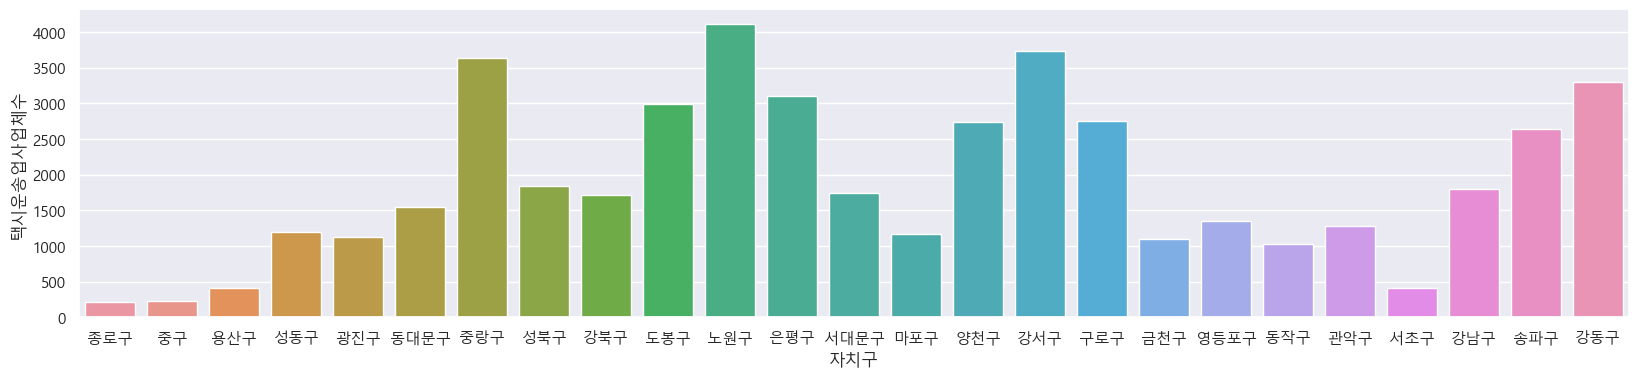

In [93]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
plt.figure(figsize = (20,4))
sns.barplot('자치구','택시운송업사업체수', data = seoul_business)

c:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='자치구', ylabel='커피전문점사업체수'>

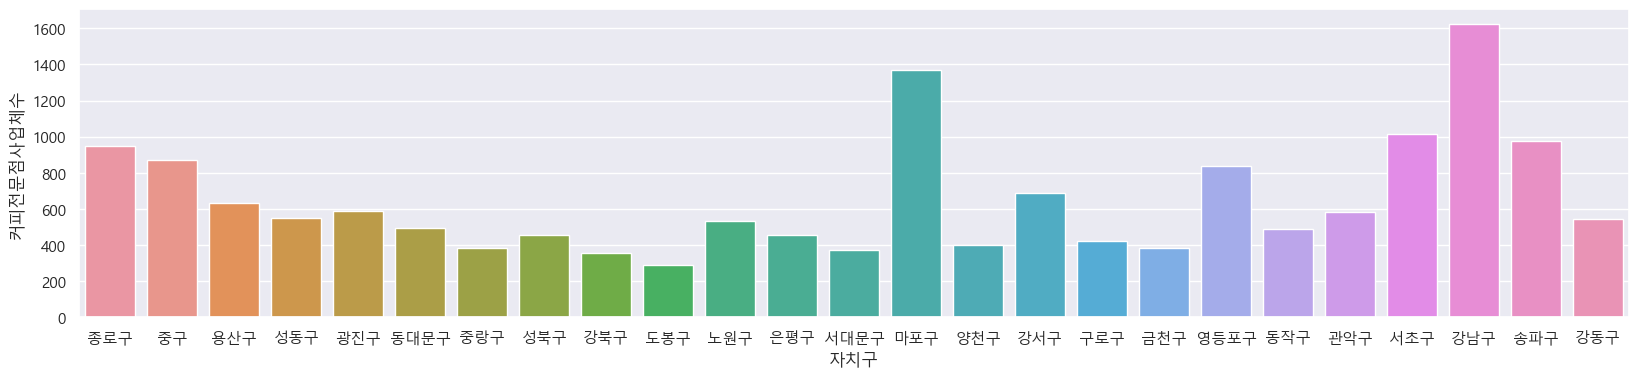

In [95]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
plt.figure(figsize = (20,4))
sns.barplot('자치구','커피전문점사업체수', data = seoul_business)

c:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='자치구', ylabel='한식 일반 음식점업사업체수'>

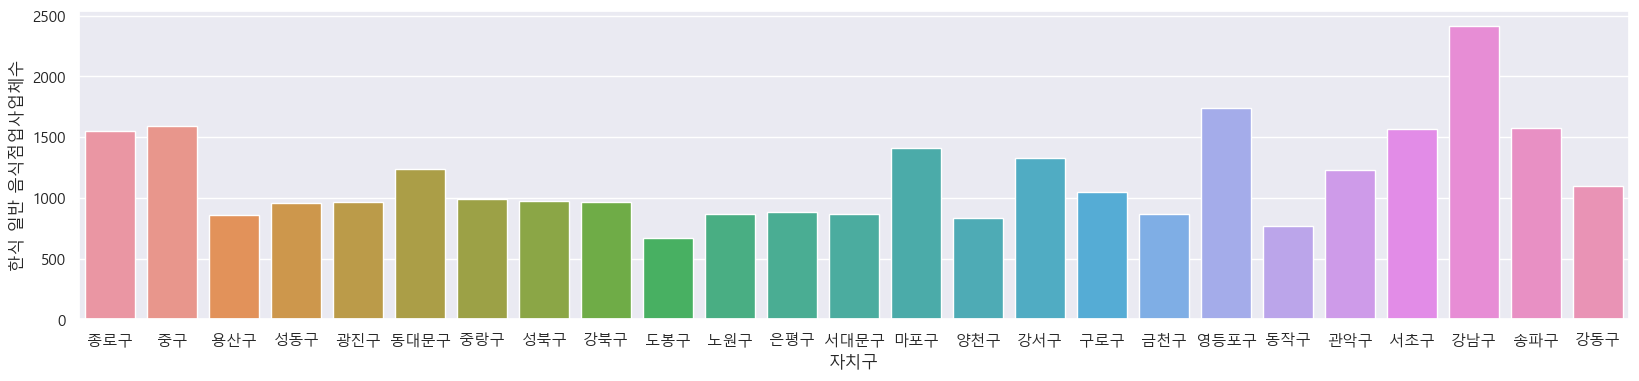

In [96]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
plt.figure(figsize = (20,4))
sns.barplot('자치구','한식 일반 음식점업사업체수', data = seoul_business)

c:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='자치구', ylabel='기타주점업사업체수'>

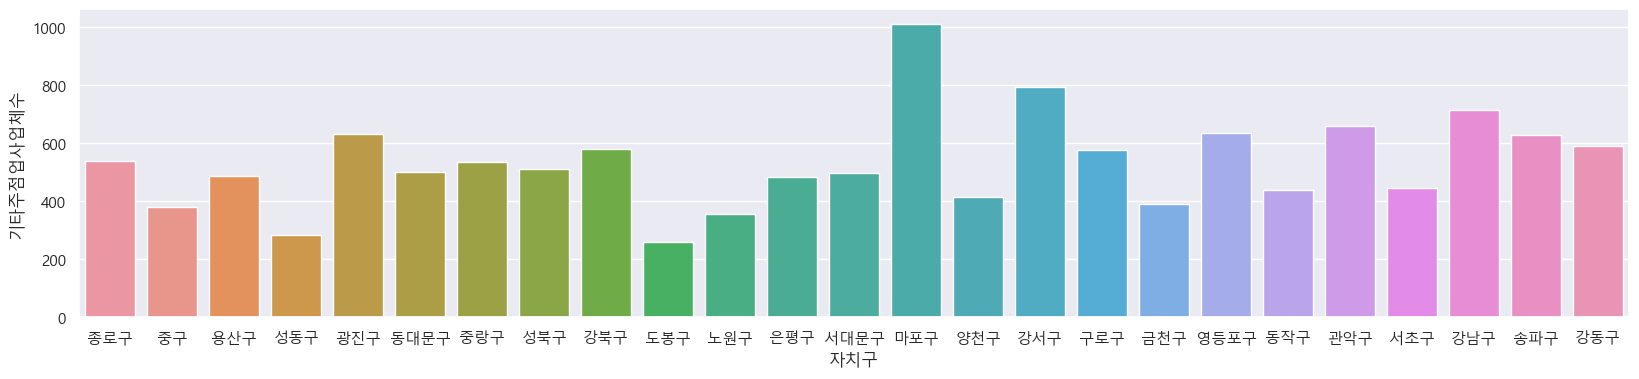

In [98]:
plt.figure(figsize = (20,4))
sns.barplot('자치구','기타주점업사업체수', data = seoul_business)

In [ ]:
# 위 차트를 통해 알게된 사실을 정리해봅시다.
# 1. 
# 2.
# 3.

---